In [ ]:
!gdown --id 13m7JpglX7AL_hggkICfbbct-kUavyPbx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=13m7JpglX7AL_hggkICfbbct-kUavyPbx
To: /content/SMIS電商與品牌近一年資料.zip
100% 61.1M/61.1M [00:00<00:00, 239MB/s]


In [ ]:
!unzip SMIS電商與品牌近一年資料.zip

Archive:  SMIS電商與品牌近一年資料.zip
replace Products.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Settings

sport = 'Training & Gym'
clothing = ['Leggings & Tights']  # ['Sports Bra', 'Leggings & Tights','']
time_range = ['2021/2/28','2022/5/9']
feature_cols = ['Feature','Material']  # Color, Gender
strList_cols = ['Color','Feature','Material']  # 資料中是以list儲存的columns 

In [ ]:
# funtioncs
import json

def check_clothing(clothing_list):
    
    clothing_list = list(map(str.strip, clothing_list.strip('][').replace("'", '').split(','))) 
    # 將讀近來文字的list轉換成list '[a,b,c]' -> [a,b,c]

    for i in clothing_list:
        if i in clothing:
            return True
    return False
    

In [ ]:
# Read Data
import pandas as pd
import numpy as np

E_Products = pd.read_csv('E_Products.csv',low_memory = False)
E_Products['CreateDate'] = pd.to_datetime(E_Products['CreateDate'])

Products = pd.read_csv('Products.csv',low_memory = False)
Products['CreateDate'] = pd.to_datetime(Products['CreateDate'])

In [ ]:
E_Products['Sport'] = E_Products['Sport'].fillna('others')
E_Products = E_Products[E_Products['Sport'].apply(lambda x: True if sport in x else False)]

Products['Sport'] = Products['Sport'].fillna('others')
Products = Products[Products['Sport'].apply(lambda x: True if sport in x else False)]

In [ ]:
E_Products['Sport']

5                                       ['Training & Gym']
11                                      ['Training & Gym']
26                                      ['Training & Gym']
40                                      ['Training & Gym']
43                           ['Running', 'Training & Gym']
                               ...                        
80822    ['Climbing', 'Running', 'Training & Gym', 'Yoga']
80828    ['Running', 'Training & Gym', 'Lifestyle', 'Yo...
80834    ['Tennis', 'Hiking & Trail', 'Walking', 'Golf'...
80841    ['Running', 'Training & Gym', 'Lifestyle', 'Yo...
80844    ['Hiking & Trail', 'Training & Gym', 'Running'...
Name: Sport, Length: 13874, dtype: object

In [ ]:
E_Products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13874 entries, 5 to 80844
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     13874 non-null  int64         
 1   _id            13874 non-null  object        
 2   Store          13874 non-null  object        
 3   Url            13874 non-null  object        
 4   Gender         13517 non-null  object        
 5   ModifiedDate   13874 non-null  object        
 6   ReviewNumber   12617 non-null  float64       
 7   AverageRating  12537 non-null  float64       
 8   Price          13343 non-null  float64       
 9   RatingTrack    11316 non-null  object        
 10  PriceTrack     11316 non-null  object        
 11  CreateDate     13874 non-null  datetime64[ns]
 12  OldPrice       6505 non-null   float64       
 13  Brand          13838 non-null  object        
 14  Bullets        13874 non-null  object        
 15  Color          1313

In [ ]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14515 entries, 10 to 106323
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           14515 non-null  int64         
 1   _id                  14515 non-null  object        
 2   Url                  14515 non-null  object        
 3   Gender               14515 non-null  object        
 4   Brand                14515 non-null  object        
 5   StyleNumber          14515 non-null  object        
 6   ProductID            4819 non-null   object        
 7   AverageRating        12528 non-null  float64       
 8   ReviewNumber         12890 non-null  float64       
 9   Name                 14515 non-null  object        
 10  Color                3720 non-null   object        
 11  Bullets              14515 non-null  object        
 12  ImageUrl             14515 non-null  object        
 13  Price                14513 no

In [ ]:
# Selecting data

df_P = Products.loc[(Products['CreateDate'] >= pd.to_datetime(time_range[0])) & (Products['CreateDate'] <= pd.to_datetime(time_range[1]))]
df_E = E_Products.loc[(E_Products['CreateDate'] >= pd.to_datetime(time_range[0])) & (E_Products['CreateDate'] <= pd.to_datetime(time_range[1]))]
df_P['Clothing'] = df_P['Clothing'].fillna('[\'nan\']')
df_E['Clothing'] = df_E['Clothing'].fillna('[\'nan\']')

In [ ]:
import ast 
ls = [] 
s = set()
for i in df_P['Clothing'].unique():
    s = s|set(ast.literal_eval(i))
clothing_dic = dict(zip(list(s), len(list(s))*[0]))

In [ ]:
for i in df_P['Clothing']:
    for j in ast.literal_eval(i):
        clothing_dic[j] += 1 
sorted(clothing_dic.items(), key=lambda x: x[1])

[('Softshells', 1),
 ('Balls', 1),
 ('Hardware', 1),
 ('Surfing', 2),
 ('Athletic & Sneakers', 2),
 ("What's New", 2),
 ('Bags', 3),
 ('We Made Too Much', 4),
 ('Water Bottles', 4),
 ('Selfcare', 4),
 ('Headphones', 4),
 ('clothing', 5),
 ('Accessories', 6),
 ('women', 7),
 ('men', 7),
 ('Fleece', 11),
 ('Insulated & Down', 14),
 ('shoes', 15),
 ('Vest', 28),
 ('Windwear', 49),
 ('Compression wear', 50),
 ('Swimwear', 71),
 ('Other Accessories', 86),
 ('Polo', 89),
 ('Skirt & Dresses', 105),
 ('Headband & Sweatband', 118),
 ('Hats & Scarves', 232),
 ('Jackets & Vests', 459),
 ('Tops', 518),
 ('Sock', 622),
 ('Bottoms', 720),
 ('Long Sleeve', 733),
 ('Pants', 1201),
 ('Tank', 1448),
 ('Hoodie & Sweatshirt', 1471),
 ('Leggings & Tights', 1671),
 ('Sports Bra', 1707),
 ('Shorts', 1968),
 ('Short Sleeve', 2067)]

In [ ]:
df_P = df_P.loc[df_P['Clothing'].apply(lambda x: check_clothing(x))]
df_E = df_E.loc[df_E['Clothing'].apply(lambda x: check_clothing(x))]

In [ ]:
df_E.shape[0]

3011

In [ ]:
pd.concat([df_E, df_P])

,Unnamed: 0,_id,Store,Url,Gender,ModifiedDate,ReviewNumber,AverageRating,Price,RatingTrack,...,ColorLock,AllColorRatio,ColorCode,ColorUpdatedCounter,ColorUpdatedDate,ColorVersion,NewColor,Pattern,ColorObj,NewArrival
63,63,603d8e95a6175c957ca8ab7a,decathlon,https://www.decathlon.co.uk/p/fitness-leggings...,women,2021-07-11,3422.0,4.6,12.99,"{'2021-07-11': {'AverageRating': None, 'Review...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,129,603d8f0dc8eb83cdf2d33463,amazon-US,https://www.amazon.com/dp/B08XH6N3DR,women,2021-03-21,9189.0,4.4,24.99,"{'2021-03-21': {'AverageRating': 4.4, 'ReviewN...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,133,603d8f1fc8eb83cdf2d33464,amazon-US,https://www.amazon.com/dp/B08XBKVXRW,women,2021-02-28,1.0,1.0,13.89,"{'2021-02-28': {'AverageRating': 1.0, 'ReviewN...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,141,603d8f2e8671f3aa935645df,dicks,https://www.dickssportinggoods.com/p/adidas-wo...,NaN,2021-03-07,0.0,NaN,50.00,"{'2021-02-28': {'AverageRating': None, 'Review...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,156,603d8f3c50484d3a36559f6d,rei,https://www.rei.com/rei-garage/product/191636/...,women,2021-03-28,1.0,5.0,75.73,"{'2021-02-28': {'RatingCount': 1.0, 'Rating': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106313,106313,62331f5d7a31776068e375e7,NaN,https://us.puma.com/us/en/pd/formknit-seamless...,women,2022-03-13,NaN,NaN,55.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nitro Blue-Puma White,NaN
106315,106315,62331f5d7a31776068e375e9,NaN,https://us.puma.com/us/en/pd/flawless-high-wai...,women,2022-03-13,NaN,NaN,70.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deep Orchid,NaN
106317,106317,62331f5e7a31776068e375eb,NaN,https://us.puma.com/us/en/pd/seamless-high-wai...,women,2022-03-13,3.0,4.7,55.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spellbound-Sunblaze,NaN
106318,106318,62331f5e7a31776068e375ec,NaN,https://us.puma.com/us/en/pd/studio-foundation...,women,2022-03-13,NaN,NaN,45.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Light Gray Heather,NaN


In [ ]:
# Preprocess

data_E = df_E[feature_cols]
data_P = df_P[feature_cols]
data_E['is_topSales'] = [1]*data_E.shape[0]
data_P['is_topSales'] = [0]*data_P.shape[0]
data = pd.concat([data_E, data_P])
data = data.reset_index()
data_x = data[feature_cols]
data_y = data['is_topSales']
if 'Price' in data_x.columns:
    data_x['Price'] = data_x['Price'].fillna(data_x['Price'].mean())
data_x = data_x.fillna('[\'nan\']')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Preprocess 2
import ast 
feature_strList_cols = []
other_feature_cols = []
for col in feature_cols:
    if col in strList_cols:
        feature_strList_cols.append(col)
        data_x[col] = data_x[col].apply(ast.literal_eval)
    else:
        other_feature_cols.append(col)

In [ ]:
# Preprocess 3
from sklearn.preprocessing import MultiLabelBinarizer
mlb_list = []
df_list = [data_x[other_feature_cols]]
for col in feature_strList_cols:
    mlb = MultiLabelBinarizer()
    df = pd.DataFrame(mlb.fit_transform(data_x[col]),columns=mlb.classes_)
    df_list.append(df)
data_x = pd.concat(df_list, axis=1)

In [ ]:
data_x

,,Athleisure,一體成型,人體工學舒適設計,保暖禦寒,刷毛布,化纖素材,反光功能,單向導溼快乾,四面彈,...,Recycled Polyester & Blended,Recycled Polyester / PET,Silk,Spandex 11~20%,Spandex <= 10%,Spandex >= 21%,WICKING. Pulls sweat away from the body to the surface of the fabric so it can evaporate faster,Wool Blended,all/any Spandex,nan
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4678,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4679,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4680,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_y[data_x['all/any Spandex']==1].value_counts()

0    1653
1     323
Name: is_topSales, dtype: int64

In [ ]:
data_y[data_x['all/any Spandex']==0].value_counts()

1    2688
0      18
Name: is_topSales, dtype: int64

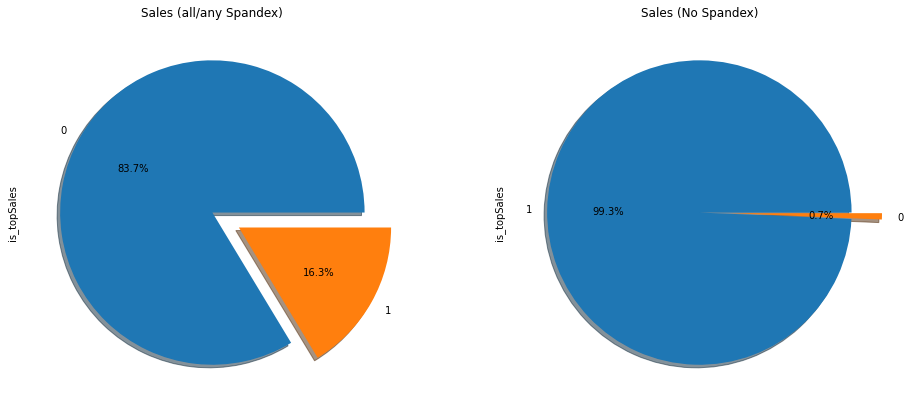

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
data_y[data_x['all/any Spandex']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
data_y[data_x['all/any Spandex']==0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Sales (all/any Spandex)')
ax[1].set_title('Sales (No Spandex)')

plt.show()

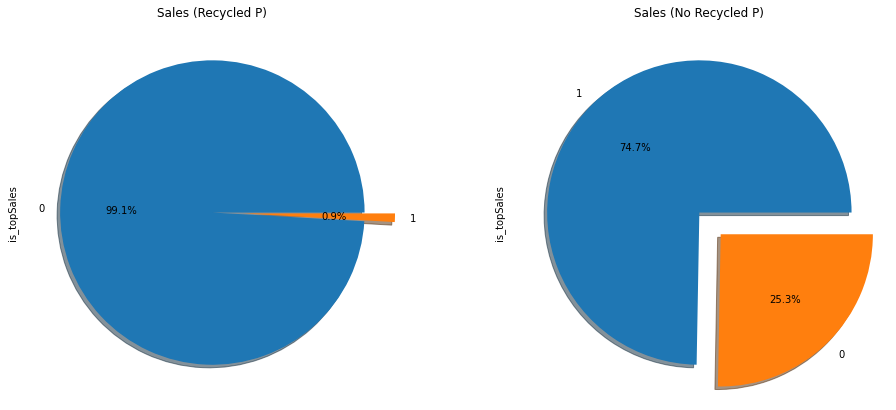

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
data_y[data_x['Recycled Polyester / PET']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
data_y[data_x['Recycled Polyester / PET']==0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Sales (Recycled P)')
ax[1].set_title('Sales (No Recycled P)')

plt.show()

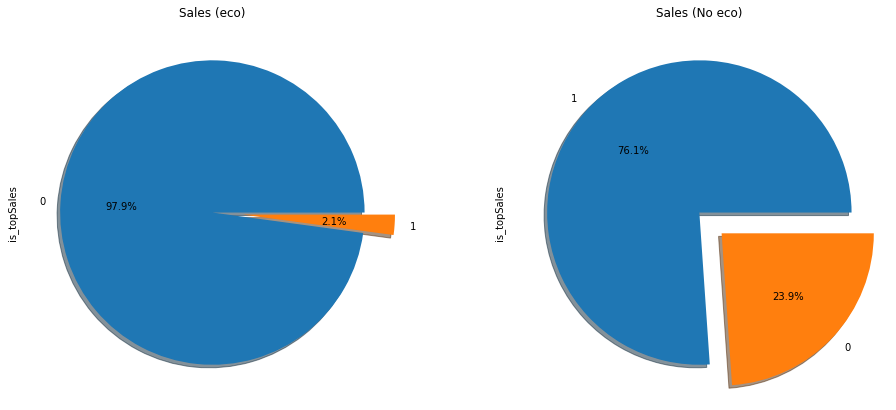

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
data_y[data_x['環保訴求']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
data_y[data_x['環保訴求']==0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Sales (eco)')
ax[1].set_title('Sales (No eco)')

plt.show()

In [ ]:
RATED UPF 50+ (Excellent Protection)

In [ ]:
data_x.columns

Index(['', 'Athleisure', '一體成型', '人體工學舒適設計', '保暖禦寒', '刷毛布', '化纖素材', '反光功能',
       '單向導溼快乾', '四面彈', '抗紫外線', '抗菌功能', '接觸涼感(金屬類)', '提升運動效能設計', '撥水', '數位印花',
       '梭織彈性', '涼爽透氣', '溫度調節', '溼度管理', '環保訴求', '異味控制', '結構性透氣', '羽絨', '肌肉支持',
       '舒適伸展', '舒適平滑縫合', '蒸發性涼感', '超輕量', '輕量', '透濕', '防水', '防風機能',
       '100% Cotton', '100% Polyamide(Nylon)', '100% Polyester', '100% Wool',
       'BREATHABLE. Sweat can easily move through the fabric, helping it evaporate',
       'Cotton Blended', 'Green Cellulose', 'Hemp Blended', 'Modal Blended',
       'PTT', 'Polyamide(Nylon) Blended', 'Polyester Blended',
       'QUICK&#45DRYING. Dries in a flash for ultimate comfort when breaking a sweat',
       'RATED UPF 50+ (Excellent Protection)', 'Recycled Cotton',
       'Recycled Cotton & Blended', 'Recycled Polyamide(Nylon) & Blended',
       'Recycled Polyamide/ Nylon / PA', 'Recycled Polyester & Blended',
       'Recycled Polyester / PET', 'Silk', 'Spandex 11~20%', 'Spandex <= 10%',
       'Spandex >

In [ ]:
data_y[data_x['RATED UPF 50+ (Excellent Protection)']==1].value_counts()

0    2
Name: is_topSales, dtype: int64

In [ ]:
data_y

0       1
1       1
2       1
3       1
4       1
       ..
4677    0
4678    0
4679    0
4680    0
4681    0
Name: is_topSales, Length: 4682, dtype: int64

In [ ]:
# Model training 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=42)
clf = DecisionTreeClassifier(max_depth = 3,random_state=0)
clf = clf.fit(X_train, y_train)


In [ ]:
clf.score(X_test, y_test)

0.9353169469598965

In [ ]:
ls = data_x.columns
ls_new = []
for i in range(len(ls)):
    s = ls[i]
    if len(s) > 350:
        ls_new.append(str(s)[:350])
    else:
        ls_new.append(s)


In [ ]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None
                , feature_names=ls_new,  class_names=['0','1'],
                filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("leggings") 

'leggings.pdf'

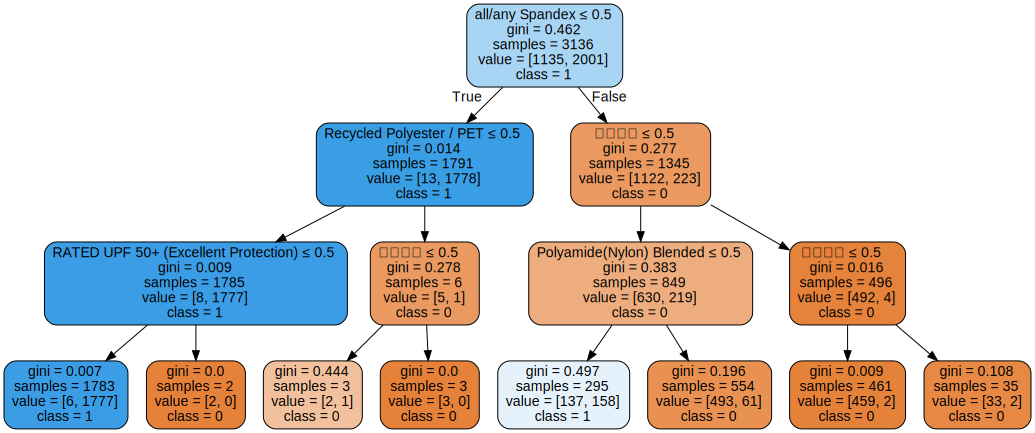

In [ ]:
graph

In [ ]:
# Model Results
